# Task 4.10

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import data 
path = r'C:\Users\fearn\Documents\lydia loser\Career Foundry\Python'
df = pd.read_pickle(os.path.join(path, 'Data', 'ord_prod_cust.pkl'))

## Assess Security Implications

In [3]:
df.head()

,user_id,First Name,Surname,Gender,State,Age,date_joined,num_of_dependants,fam_status,income,...,busiest day,Busiest days,Busiest period of day,max_order,loyalty_flag,mean_prices,spending_flag,median_days_prior_order,order_freq_flag,_merge
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest days,Most orders,8,New Customer,7.988281,Low Spender,19.0,Regular customer,both
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Most orders,8,New Customer,7.988281,Low Spender,19.0,Regular customer,both
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest days,Most orders,8,New Customer,7.988281,Low Spender,19.0,Regular customer,both
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Most orders,8,New Customer,7.988281,Low Spender,19.0,Regular customer,both
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Least busy days,Most orders,8,New Customer,7.988281,Low Spender,19.0,Regular customer,both


Observation: First name and Surname are identifiable variables. Columns can be dropped as not necessary for our analysis and are PII elements.

In [4]:
# Drop first name column 
df = df.drop(columns = ['First Name'])

In [5]:
# Drop Surname column 
df = df.drop(columns = ['Surname'])

No other PII elements in data.

In [6]:
# Check
df.head()

,user_id,Gender,State,Age,date_joined,num_of_dependants,fam_status,income,order_id,order_number,...,busiest day,Busiest days,Busiest period of day,max_order,loyalty_flag,mean_prices,spending_flag,median_days_prior_order,order_freq_flag,_merge
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,Regularly busy,Busiest days,Most orders,8,New Customer,7.988281,Low Spender,19.0,Regular customer,both
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,Regularly busy,Regularly busy,Most orders,8,New Customer,7.988281,Low Spender,19.0,Regular customer,both
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,Regularly busy,Busiest days,Most orders,8,New Customer,7.988281,Low Spender,19.0,Regular customer,both
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,Regularly busy,Regularly busy,Most orders,8,New Customer,7.988281,Low Spender,19.0,Regular customer,both
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,Regularly busy,Least busy days,Most orders,8,New Customer,7.988281,Low Spender,19.0,Regular customer,both


## Create region flag

In [8]:
# Create region groups 
Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [10]:
# Creating region flag vairable
df.loc[df['State'].isin(Northeast), 'Region'] = 'Northeast'
df.loc[df['State'].isin(Midwest), 'Region'] = 'Midwest'
df.loc[df['State'].isin(South), 'Region'] = 'South'
df.loc[df['State'].isin(West), 'Region'] = 'West'

In [12]:
# Check value counts
df['Region'].value_counts(dropna = False)

South        10790096
West          8291679
Midwest       7596065
Northeast     5721892
Name: Region, dtype: int64

## Comparing spending habits in different US regions

In [13]:
# Create crosstab
crosstab = pd.crosstab(df['Region'], df['spending_flag'], dropna = False)

In [14]:
crosstab

spending_flag,High Spender,Low Spender
Region,,
Midwest,29240,7566825
Northeast,18619,5703273
South,40394,10749702
West,31207,8260472


In [15]:
# Exporting crosstab to Excel
crosstab.to_clipboard()

## Exclusion flag for low activity customers

In [16]:
# Create a subset for the data where max_orders are greater than 5
df_high_act_cust = df[df['max_order'] > 5]

In [17]:
# Check
df_high_act_cust['max_order'].min()

6

In [19]:
df.shape

(32399732, 32)

In [20]:
df_high_act_cust.shape

(30166708, 32)

Shape difference shows vairables have been removed

In [21]:
# Export subset data
df_high_act_cust.to_pickle(os.path.join(path, 'Data', 'data_high_activity_customers.pkl'))

## Customer Profiling

#### Age range profile

In [22]:
df['Age'].min()

18

In [23]:
# Create a profile variable for age
df.loc[df['Age'] >= 65, 'Age_group'] = 'Senior Adults'
df.loc[(df['Age'] < 65) & (df['Age'] >= 35), 'Age_group'] = 'Middle Age'
df.loc[df['Age'] < 35, 'Age_group'] = 'Young Adult'

In [24]:
df['Age_group'].value_counts(dropna = False)

Middle Age       15199714
Young Adult       8626267
Senior Adults     8573751
Name: Age_group, dtype: int64

#### Income profile

In [26]:
df['income'].describe()

count    3.239973e+07
mean     9.941685e+04
std      4.300669e+04
min      2.590300e+04
25%      6.699600e+04
50%      9.660800e+04
75%      1.278840e+05
max      5.939010e+05
Name: income, dtype: float64

In [28]:
df['income'].mean()

99416.85172744638

In [29]:
# Create a profile for income
df.loc[df['income'] >= 125000, 'income_bracket'] = 'Higher Income'
df.loc[(df['income'] < 125000) & (df['income'] >= 70000), 'income_bracket'] = 'Middle Income'
df.loc[df['income'] < 70000, 'income_bracket'] = 'Lower Income'

In [30]:
df['income_bracket'].value_counts(dropna = False)

Middle Income    14777449
Lower Income      8995710
Higher Income     8626573
Name: income_bracket, dtype: int64

#### Dependents profile

In [31]:
# Create a profile if the customers have dependents or not
df.loc[df['num_of_dependants'] == 0, 'Dependents'] = 'No dependents'
df.loc[df['num_of_dependants'] >= 1, 'Dependents'] = 'Has dependents'

In [32]:
df['Dependents'].value_counts(dropna = False)

Has dependents    24303457
No dependents      8096275
Name: Dependents, dtype: int64

## Visualisations

#### Bar chart - distribution of orders amongst age groups

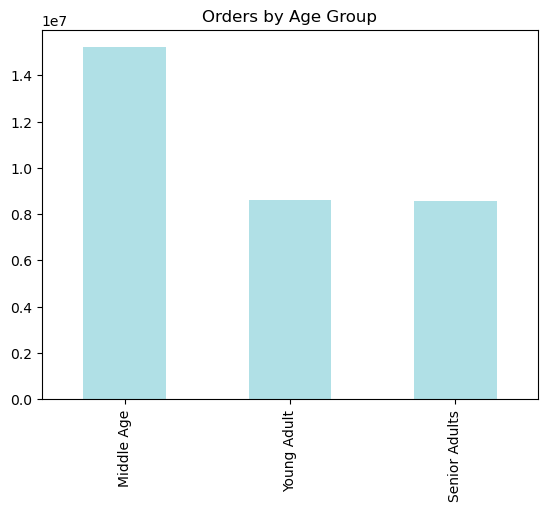

In [56]:
bar_age_groups = df['Age_group'].value_counts().plot.bar(color = 'powderblue', title = 'Orders by Age Group')

Observation: most orders occur in Middle Age individuals

In [57]:
# Export
bar_age_groups.figure.savefig(os.path.join(path, 'Visualisations', 'bar_age_group.png'))

#### Bar chart - distribution of orders amongst income bracket

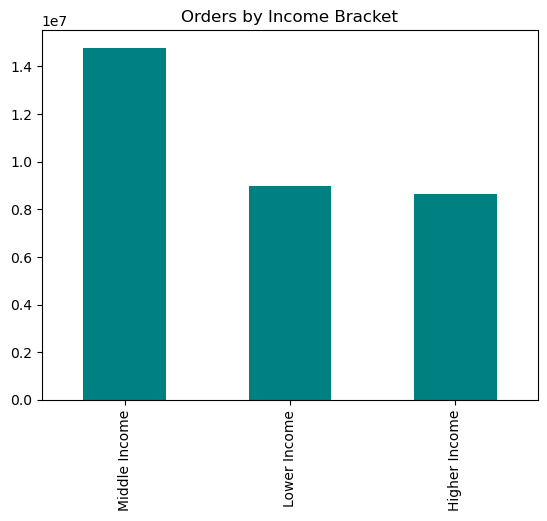

In [53]:
bar_income_bracket = df['income_bracket'].value_counts().plot.bar(color = 'teal', title = 'Orders by Income Bracket')

Observation: Most orders occur in Middle income group

In [54]:
# Export
bar_income_bracket.figure.savefig(os.path.join(path, 'Visualisations', 'bar_income_bracket.png'))

#### Department visualisation

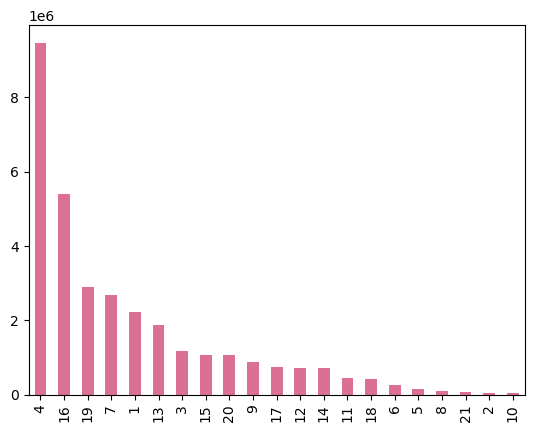

In [40]:
# Bar chart distribution of orders by department id
bar_depart_orders = df['department_id'].value_counts().plot.bar(color = 'palevioletred')

In [41]:
# Create new variable for department names 
df.loc[df['department_id'] == 1, 'Department'] = 'frozen'
df.loc[df['department_id'] == 2, 'Department'] = 'other'
df.loc[df['department_id'] == 3, 'Department'] = 'bakery'
df.loc[df['department_id'] == 4, 'Department'] = 'produce'
df.loc[df['department_id'] == 5, 'Department'] = 'alcohol'
df.loc[df['department_id'] == 6, 'Department'] = 'international'
df.loc[df['department_id'] == 7, 'Department'] = 'beverages'
df.loc[df['department_id'] == 8, 'Department'] = 'pets'
df.loc[df['department_id'] == 9, 'Department'] = 'dry goods'
df.loc[df['department_id'] == 10, 'Department'] = 'bulk'
df.loc[df['department_id'] == 11, 'Department'] = 'personal care'
df.loc[df['department_id'] == 12, 'Department'] = 'meat/seafood'
df.loc[df['department_id'] == 13, 'Department'] = 'pantry'
df.loc[df['department_id'] == 14, 'Department'] = 'breakfast'
df.loc[df['department_id'] == 15, 'Department'] = 'canned goods'
df.loc[df['department_id'] == 16, 'Department'] = 'dairy'
df.loc[df['department_id'] == 17, 'Department'] = 'household'
df.loc[df['department_id'] == 18, 'Department'] = 'babies'
df.loc[df['department_id'] == 19, 'Department'] = 'snacks'
df.loc[df['department_id'] == 20, 'Department'] = 'deli'
df.loc[df['department_id'] == 21, 'Department'] = 'missing'

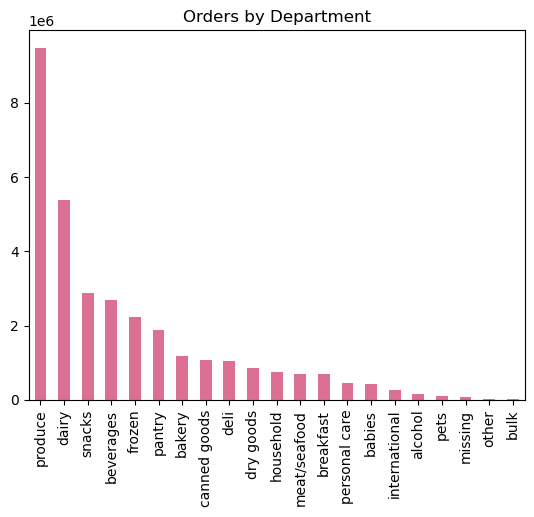

In [52]:
bar_depart_orders = df['Department'].value_counts().plot.bar(color = 'palevioletred', title = 'Orders by Department')

In [55]:
# Export bar chart
bar_depart_orders.figure.savefig(os.path.join(path, 'Visualisations', 'bar_depart_orders.png'))

#### Number of dependents visualisation

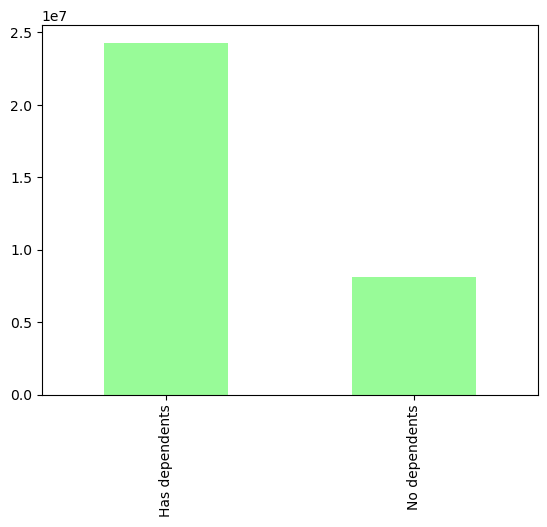

In [44]:
bar_dependents = df['Dependents'].value_counts().plot.bar(color = 'palegreen')

#### Stacked barcharts - department and age

In [59]:
#Grouping department and age
depart_age = df.groupby(['Department', 'Age_group']).size().unstack(fill_value=0)

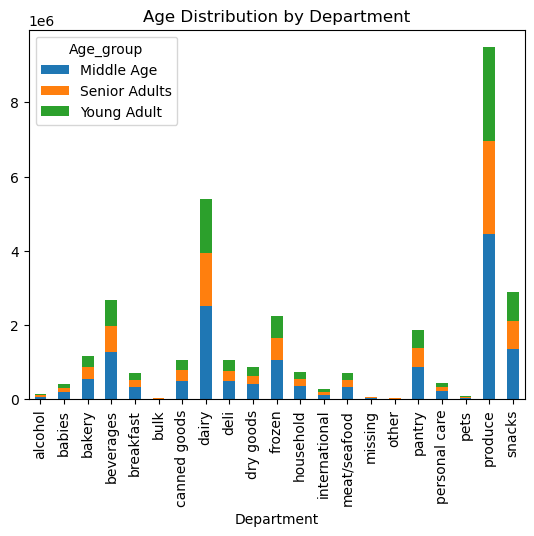

In [64]:
# Plot grouped data as stacked bar chart
bar_depart_age = depart_age.plot.bar(stacked=True, title='Age Distribution by Department')

In [65]:
# Export
bar_depart_age.figure.savefig(os.path.join(path, 'Visualisations', 'bar_depart_age.png'))

#### Stacked barcharts - department by income bracket

In [62]:
#Grouping department and income bracket
depart_income = df.groupby(['Department', 'income_bracket']).size().unstack(fill_value=0)

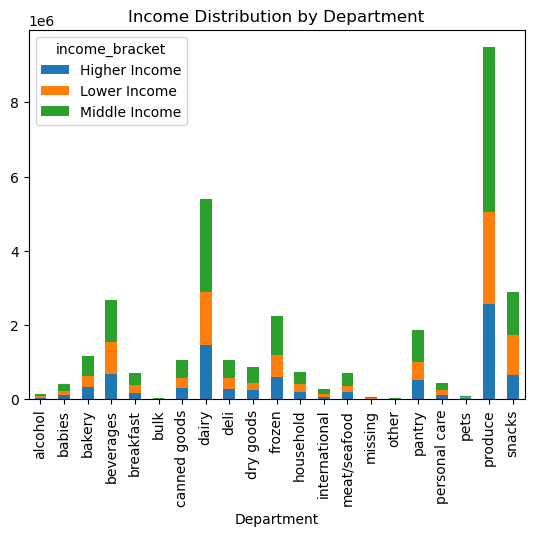

In [66]:
# Plot grouped data as stacked bar chart
bar_depart_income = depart_income.plot.bar(stacked=True, title='Income Distribution by Department')

In [68]:
# Export
bar_depart_income.figure.savefig(os.path.join(path, 'Visualisations', 'bar_depart_income.png'))

#### Stacked barcharts - department by dependents

In [67]:
#Grouping department and dependents
depart_dependents = df.groupby(['Department', 'Dependents']).size().unstack(fill_value=0)

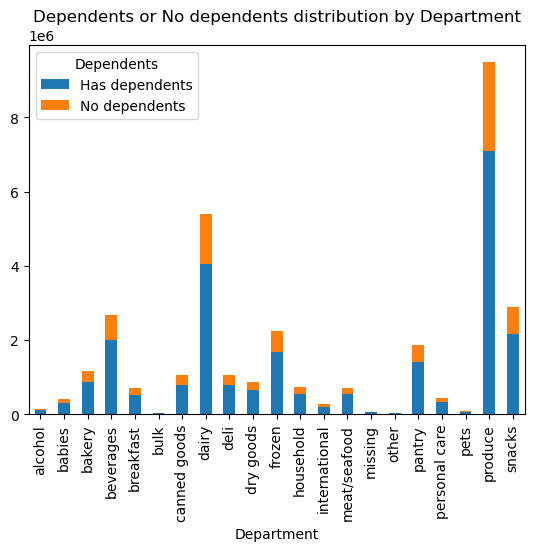

In [69]:
# Plot grouped data as stacked bar chart
bar_depart_depend = depart_dependents.plot.bar(stacked=True, title = 'Dependents or No dependents distribution by Department')

In [70]:
# Export
bar_depart_depend.figure.savefig(os.path.join(path, 'Visualisations', 'bar_depart_depend.png'))

#### Family status visualisations

In [72]:
df['fam_status'].value_counts(dropna = False)

married                             22753055
single                               5324920
divorced/widowed                     2771355
living with parents and siblings     1550402
Name: fam_status, dtype: int64

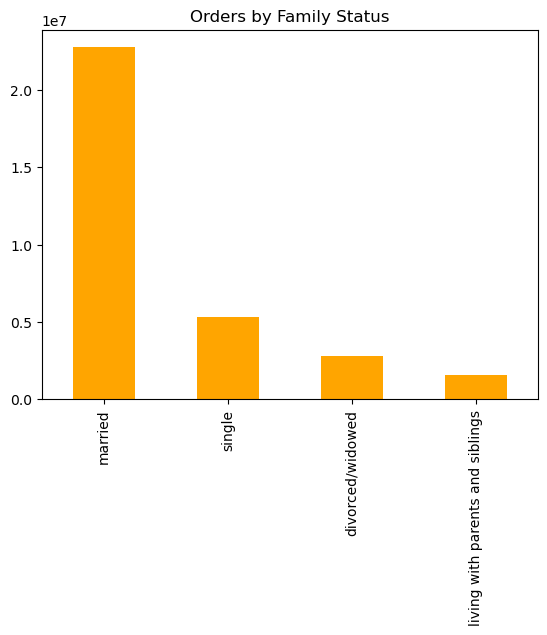

In [73]:
bar_fam_stat = df['fam_status'].value_counts().plot.bar(color = 'orange', title = 'Orders by Family Status')

In [74]:
# Export 
bar_fam_stat.figure.savefig(os.path.join(path, 'Visualisations', 'bar_fam_stat.png'))

#### Pie charts to show customer profiles

In [78]:
df['Age_group'].value_counts(dropna = False)

Middle Age       15199714
Young Adult       8626267
Senior Adults     8573751
Name: Age_group, dtype: int64

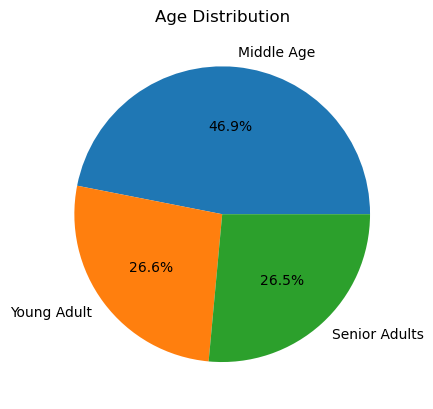

In [84]:
# Pie chart for age group demographic
age_group = 'Middle Age', 'Young Adult', 'Senior Adults'
sizes = [15199714, 8626267, 8573751]

plt.pie(sizes, labels = age_group, autopct='%1.1f%%')
plt.title('Age Distribution')
plt.savefig(os.path.join(path, 'Visualisations', 'Pie_age.png'))
plt.show()

In [85]:
df['income_bracket'].value_counts(dropna = False)

Middle Income    14777449
Lower Income      8995710
Higher Income     8626573
Name: income_bracket, dtype: int64

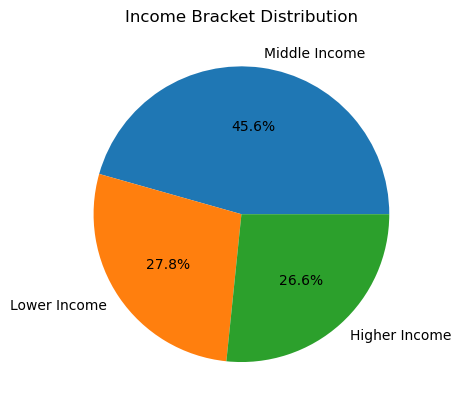

In [86]:
# Pie chart for income demographic
income = 'Middle Income', 'Lower Income', 'Higher Income'
sizes = [14777449, 8995710, 8626573]

plt.pie(sizes, labels = income, autopct='%1.1f%%')
plt.title('Income Bracket Distribution')
plt.savefig(os.path.join(path, 'Visualisations', 'Pie_income.png'))
plt.show()

In [87]:
df['Dependents'].value_counts(dropna = False)

Has dependents    24303457
No dependents      8096275
Name: Dependents, dtype: int64

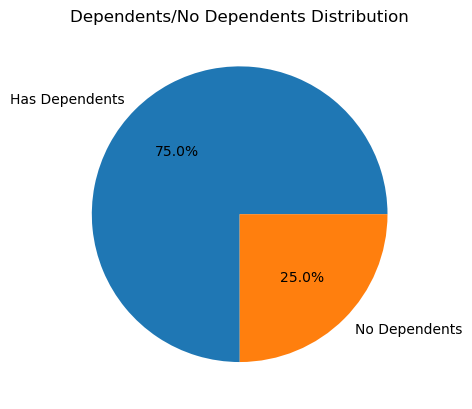

In [88]:
# Pie chart for dependents demographic
dependents = 'Has Dependents', 'No Dependents'
sizes = [24303457, 8096275]

plt.pie(sizes, labels = dependents, autopct='%1.1f%%')
plt.title('Dependents/No Dependents Distribution')
plt.savefig(os.path.join(path, 'Visualisations', 'Pie_dependents.png'))
plt.show()

## Aggreations

In [89]:
# age and spending aggregations
df.groupby('Age_group').agg({'prices': ['mean', 'min', 'max']})

prices           
                   mean  min   max
Age_group                         
Middle Age     7.790730  1.0  25.0
Senior Adults  7.796417  1.0  25.0
Young Adult    7.785585  1.0  25.0

In [90]:
# income and spending aggregations
df.groupby('income_bracket').agg({'prices': ['mean', 'min', 'max']})

prices           
                    mean  min   max
income_bracket                     
Higher Income   7.957043  1.0  25.0
Lower Income    7.349499  1.0  25.0
Middle Income   7.962536  1.0  25.0

In [91]:
# dependents and spending aggregations
df.groupby('Dependents').agg({'prices': ['mean', 'min', 'max']})

prices           
                    mean  min   max
Dependents                         
Has dependents  7.791204  1.0  25.0
No dependents   7.789846  1.0  25.0

In [92]:
# age and usage frequency aggregations
df.groupby('Age_group').agg({'days_since_last_order': ['mean', 'min', 'max']})

days_since_last_order           
                               mean  min   max
Age_group                                     
Middle Age                11.108793  0.0  30.0
Senior Adults             11.078526  0.0  30.0
Young Adult               11.120703  0.0  30.0

In [93]:
# income and usage frequency aggregations
df.groupby('income_bracket').agg({'days_since_last_order': ['mean', 'min', 'max']})

days_since_last_order           
                                mean  min   max
income_bracket                                 
Higher Income              11.023699  0.0  30.0
Lower Income               11.282315  0.0  30.0
Middle Income              11.042758  0.0  30.0

In [94]:
# dependents and usage frequency aggregations
df.groupby('Dependents').agg({'days_since_last_order': ['mean', 'min', 'max']})

days_since_last_order           
                                mean  min   max
Dependents                                     
Has dependents             11.111693  0.0  30.0
No dependents              11.080729  0.0  30.0

## Regional Grouping of customer profiles

In [97]:
#Grouping age and region
age_region = df.groupby(['Region', 'Age_group']).size().unstack(fill_value=0)

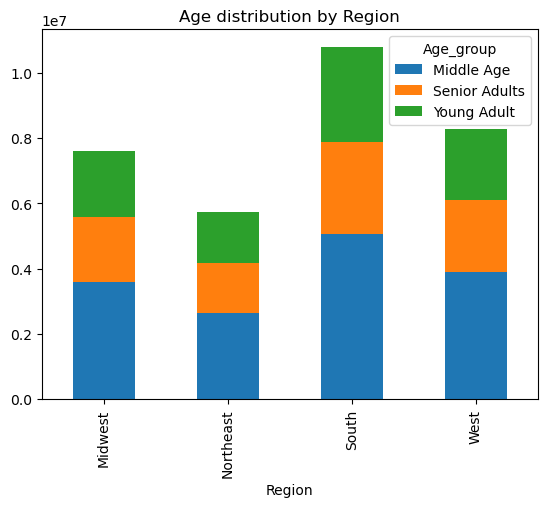

In [105]:
# Stacked bar chart
age_region_bar = age_region.plot.bar(stacked = True, title = 'Age distribution by Region')

In [106]:
#Export 
age_region_bar.figure.savefig(os.path.join(path, 'Visualisations', 'age_region_bar.png'))

In [99]:
#Grouping income and region
income_region = df.groupby(['Region', 'income_bracket']).size().unstack(fill_value=0)

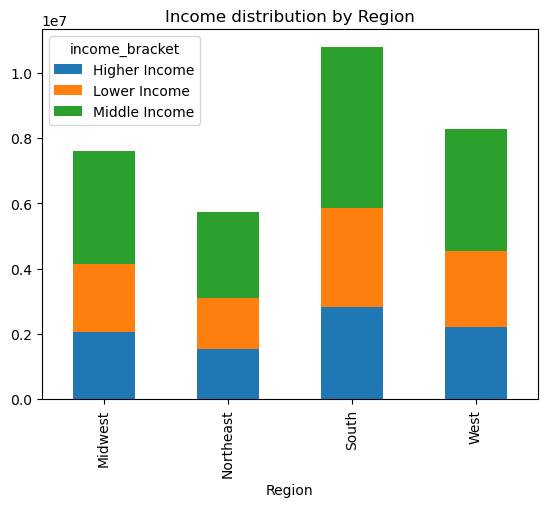

In [107]:
# Stacked bar chart
income_region_bar = income_region.plot.bar(stacked = True, title = 'Income distribution by Region')

In [108]:
#Export 
income_region_bar.figure.savefig(os.path.join(path, 'Visualisations', 'income_region_bar.png'))

In [101]:
#Grouping dependents and region
dependents_region = df.groupby(['Region', 'Dependents']).size().unstack(fill_value=0)

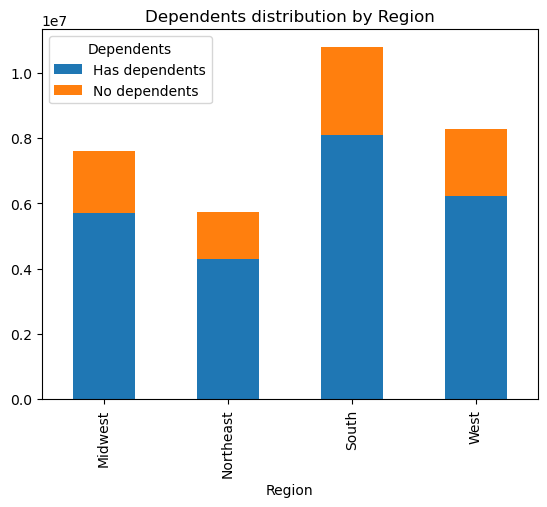

In [109]:
# Stacked bar chart
dependents_region_bar = dependents_region.plot.bar(stacked = True, title = 'Dependents distribution by Region')

In [110]:
#Export 
dependents_region_bar.figure.savefig(os.path.join(path, 'Visualisations', 'dependents_region_bar.png'))